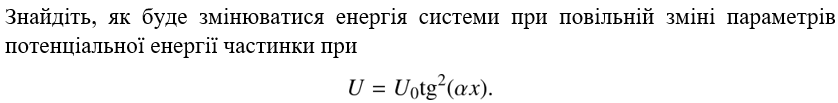

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

In [2]:
# Объявление переменных и функций

U_0 = var("U_0")
m,t, g, R = var("m,t, g, R")

V_phi = var("v_phi")
v_phi = function("v_phi")(t)

Phi = var("phi")
phi = function("phi")(t)

P_phi = var("p")
p_phi = function("p")(t)

Alpha = var("alpha")
alpha = function("alpha")(t)

In [3]:
# Кинетическая энергия в координатах phi

Tx = (1/2) * m*((R*phi.diff(t))^2)
disp(Tx)

<IPython.core.display.Math object>

In [4]:
# уравнения замены производных обобщенных координат на v

subs_to_v      = [phi.diff(t) == V_phi/R]
subs_to_v_func = [phi.diff(t) == v_phi/R]

In [5]:
# Потенциальная энергия в координатах x

# U = U_0 * tan(alpha * x)^2
#U = U_0 * alpha * x^2
U = m * g * R * cos(phi)

disp(U)

<IPython.core.display.Math object>

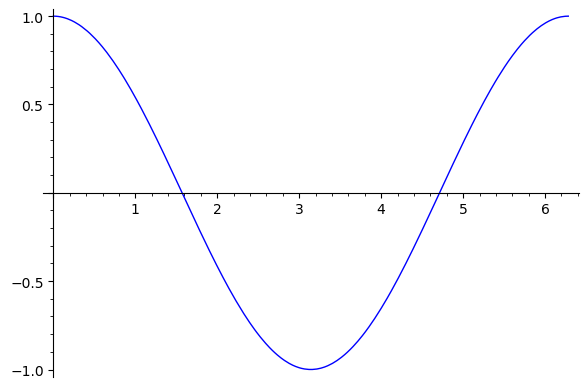

In [49]:
plot(U.subs(m == 1, g == 1, R == 1, phi == Phi), Phi, 0, 2*pi)

In [6]:
# производная потенциальной энергии по координате
dUdX = diff(U.subs(phi == Phi), Phi)
disp(dUdX)

<IPython.core.display.Math object>

In [7]:
# находим точку минимума потенциальной энергии
# приравнивая первую производную потенциальной энергии нулю

eq = dUdX.subs(alpha == Alpha) == 0
disp(eq)
disp(eq.lhs().operands())
# disp(solve (eq, X))
U_min = []
for operand in eq.lhs().operands():
    U_min += solve (operand == 0, Phi)
disp(U_min)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# координата минимума потенциальной энергии
X_U_min = Phi.subs(U_min)
X_U_min

0

In [9]:
# производная потенциальной энергии по координате
# в точке минимума потенциальной энергии
disp(dUdX.subs(U_min))

<IPython.core.display.Math object>

In [10]:
# Лагранжиан

L = Tx - U
disp(L)

<IPython.core.display.Math object>

In [11]:
# в Лагранжиане производим замену производных обобщенных координат на v

L = L.subs(subs_to_v)
disp(L)

<IPython.core.display.Math object>

Найдем обобщенные импульсы

$P = \frac{\partial L}{\partial \dot{x}} = \frac{\partial L}{\partial {v}}$

In [12]:
P1 = L.diff(V_phi).subs(V_phi == v_phi)
disp(P1)

<IPython.core.display.Math object>

Найдем обобщенные силы

$\frac{\partial L}{\partial {x}} = F$

In [13]:
F1 = L.subs(phi == Phi).diff(Phi).subs(Phi == phi)
disp(F1)

<IPython.core.display.Math object>

Запишем уравнения Эйлера-Лагранжа

$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial {x}} = 0$

In [14]:
de1 = P1.diff(t) - F1 == 0
disp(de1)

<IPython.core.display.Math object>

In [15]:
disp(de1.full_simplify().expand())

<IPython.core.display.Math object>

In [52]:
disp(de1.diff(t))

<IPython.core.display.Math object>

Выразим энергию через Лагранжиан

$E = \Sigma_{i}^{} \frac {\partial L}{\partial \dot{q}_i} \frac {q_i}{dt} - L$

In [16]:
E = P1 * v_phi - L
disp (E)

<IPython.core.display.Math object>

# Поиск периода колебаний

In [17]:
# Запишем дифференциальное уравнение выражающее закон сохранения энергии
E = var("E")
de_E = E == (P1 * v_phi - L).subs(V_phi == v_phi, alpha == Alpha).substitute_function(v_phi == R * phi.diff(t))
disp(de_E)

<IPython.core.display.Math object>

In [18]:
# выражаем производную координаты по времени через энергию
# подготавливаем полученное дифференциальное уравнение к дифференцированию

sol_dxdt_E = solve(de_E, phi.diff(t))
disp(sol_dxdt_E)

<IPython.core.display.Math object>

Разделяя переменные интегрируем полученное выражение по координате 
от минимальной координаты до максимальной
получаем выражение для периода колебаний

Максимальная и минимальная координата находятся из условия равенства полной энергии потенциальной энергии или равенства кинетической энергии нулю

In [19]:
# уравнение в котором приравниваем полную энергию E потенциальной энергии

eq_E_U = E == (P1 * V_phi - L).subs(v_phi == V_phi, alpha == Alpha).subs(V_phi == 0).subs(phi == Phi)
disp(eq_E_U)

<IPython.core.display.Math object>

In [20]:
# решая его получаем точки, в котором потенциальная энергия равна полной

sol_x_E = solve(eq_E_U, Phi)
disp(sol_x_E)

<IPython.core.display.Math object>

In [21]:
# разделяем переменные в дифференциальном уравнении
# выражающем закон сохранения энергии
# получаем интегранд при dx
dx_integrand = 1/sol_dxdt_E[0].rhs().subs(phi == Phi)
disp(dx_integrand)

<IPython.core.display.Math object>

In [22]:
# интегрируем интегранд при dx по иксу
assume(E>0)

t_integral_maxima = dx_integrand.integrate(Phi, algorithm = "maxima")
#disp(t_integral_maxima)
t_integral_maxima

-R*integrate(1/sqrt(-2*R*g*cos(phi) + 2*E/m), phi)

In [23]:
# полученный неопределённый интеграл дифференцируем
# для проверки правильности дифференцирования
disp(t_integral_maxima.diff(Phi).full_simplify())

<IPython.core.display.Math object>

# Интегрирование уравнений Гамильтона

In [24]:
# Объявление переменных - обобщенные импульсы

p_1, p_2 = var ("p_1, p_2")

In [25]:
# Записываем уравнения выражающие обобщенные импульсы
# через производные Лагранжиана по скорости изменения обобщенной координаты (по v)

eq_p_v = [p_1 == L.diff(V_phi)]
disp(eq_p_v[0])

<IPython.core.display.Math object>

In [26]:
# Ищем выражение для v через обобщенные импульсы, решая вышесозданную систему уравнений

sol_v_p = solve(eq_p_v, [V_phi])
disp(sol_v_p)

<IPython.core.display.Math object>

In [27]:
# Находим выражение для Гамильтониана исходя из
# выражения энергии через Лагранжиан
# используя вышенайденную подстановку, выражающую omega через обобщенные импульсы и координаты

H = (p_1 * V_phi - L).subs(sol_v_p).subs(phi == Phi)
disp(H)

<IPython.core.display.Math object>

In [28]:
H

R*g*m*cos(phi) + 1/2*p_1^2/m

Записываем уравнения Гамильтона

$\dot{p}_i = - \frac{\partial H}{\partial q_i}$

$\dot{q}_i = \frac{\partial H}{\partial p_i}$

In [29]:
dot_p1 = - H.diff(Phi)
dot_x1 =   H.diff(p_1)

In [30]:
disp(dot_p1)

<IPython.core.display.Math object>

In [31]:
dot_p1

R*g*m*sin(phi)

In [32]:
disp(dot_x1)

<IPython.core.display.Math object>

In [33]:
dot_x1

p_1/m

In [34]:
# полученные уравнения Гамильтона обьединяем в систему из 2 уравнений
des = [dot_p1, dot_x1]
disp(des)

<IPython.core.display.Math object>

In [35]:
alpha_subs = alpha == 1# + 0.01 * t
alpha_subs

alpha(t) == 1

In [36]:
values = [g == 1, m == 1, R == 1*alpha, alpha_subs]
values

[g == 1, m == 1, R == alpha(t), alpha(t) == 1]

In [37]:
H_subs = H.subs(values).subs(alpha_subs)
H_subs

1/2*p_1^2 + cos(phi)

In [38]:
# в которой делаем подстановку численных значений масс, длин и ускорения свободного падения
f = [de_i.subs(values).subs(alpha_subs) for de_i in des]
disp(f)

<IPython.core.display.Math object>

In [43]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times = srange(0, 24, 0.01)

p0 = 0.3
p0 = 0.0001
x0 = 0

sol = desolve_odeint(des=f, ics=[p0,x0], times=times, dvars=[p_1, Phi], ivar=t)

In [44]:
for t_,p_,q_ in zip(times,sol[:,0], sol[:,1]):
    print(t_,p_,q_)

0.000000000000000 0.0001 0.0
0.0100000000000000 0.00010000500018639756 1.0000305149244936e-06
0.0200000000000000 0.00010002000119762478 2.000159137186077e-06
0.0300000000000000 0.0001000450043820097 3.0004821128941346e-06
0.0400000000000000 0.00010008001334651028 4.001110605242521e-06
0.0500000000000000 0.0001001250421464761 5.00210484014219e-06
0.0600000000000000 0.00010018009952362252 6.003576729966357e-06
0.0700000000000000 0.00010024519067038767 7.0056314955851785e-06
0.0800000000000000 0.00010032032077920965 8.008374357868816e-06
0.0900000000000000 0.00010040549504252658 9.011910537687435e-06
0.100000000000000 0.00010050071865277659 1.001634525591119e-05
0.110000000000000 0.00010060599680239776 1.1021783733410247e-05
0.120000000000000 0.00010072133468382825 1.2028331191054764e-05
0.130000000000000 0.00010084673748950614 1.3036092849714904e-05
0.140000000000000 0.00010098221041186956 1.404517393026083e-05
0.150000000000000 0.00010112775864335661 1.5055679653562699e-05
0.16000000000

3.93999999999996 0.0025722061016236735 0.002570262019157731
3.94999999999996 0.002598037670705304 0.0025961129613061326
3.95999999999996 0.0026241290624317484 0.0026222235342254303
3.96999999999996 0.0026504828843943056 0.002648596347438659
3.97999999999996 0.0026771017697280477 0.0026752340359939173
3.98999999999996 0.002703988377306101 0.002702139260658888
3.99999999999996 0.002731145391933928 0.0027293147081153537
4.00999999999996 0.0027585755245436118 0.0027567630911537167
4.01999999999996 0.002786281512388129 0.00278448714886751
4.02999999999996 0.0028142661192356432 0.0028124896468479234
4.03999999999996 0.0028425321355637773 0.002840773377378316
4.04999999999996 0.002871082378753899 0.0028693411596287335
4.05999999999996 0.0028999196932854025 0.002898195839850428
4.06999999999996 0.0029290469745388223 0.0029273403151820285
4.07999999999996 0.002958467208928843 0.002956777573787565
4.08999999999996 0.002988183347212729 0.002986510568149958
4.09999999999996 0.0030181983630902668 0

10.2899999999998 1.2964528322952371 1.4105057829500312
10.2999999999998 1.3063347392723812 1.4235197044713475
10.3099999999998 1.3162358098622897 1.4366325419587618
10.3199999999998 1.3261544837619872 1.4498444796188277
10.3299999999998 1.3360891567140383 1.463155685588861
10.3399999999998 1.3460381817408418 1.476566311654491
10.3499999999998 1.3559998695755322 1.490076492885606
10.3599999999998 1.3659724883815727 1.5036863471993627
10.3699999999998 1.3759542634851614 1.5173959749184274
10.3799999999998 1.3859433771204566 1.5312054583244543
10.3899999999998 1.3959379694669267 1.5451148613939434
10.3999999999998 1.4059361437702036 1.559124230124819
10.4099999999998 1.4159359573509303 1.5732335907919734
10.4199999999998 1.4259354241615978 1.5874429498854823
10.4299999999998 1.4359325154285751 1.6017522937620725
10.4399999999998 1.4459251596521365 1.6161615881960325
10.4499999999998 1.4559112426287184 1.6306707779267342
10.4599999999998 1.4658886074954036 1.6452797862027666
10.46999999999

19.2000000000002 0.0014043607196912989 6.28165425650981
19.2100000000002 0.0013891200805475122 6.281668223896578
19.2200000000002 0.0013740183446132315 6.281682039583237
19.2300000000002 0.0013590540026861522 6.28169570495041
19.2400000000002 0.0013442255595742703 6.281709221363426
19.2500000000002 0.0013295315339704628 6.281722590172431
19.2600000000002 0.0013149704583294518 6.281735812712506
19.2700000000002 0.0013005408787471516 6.281748890303764
19.2800000000002 0.0012862413548423992 6.281761824251468
19.2900000000002 0.0012720704596410704 6.2817746158461265
19.3000000000002 0.0012580267794625763 6.281787266363597
19.3100000000002 0.001244108913808747 6.281799777065186
19.3200000000002 0.001230315475255096 6.281812149197742
19.3300000000002 0.0012166450893444695 6.281824383993751
19.3400000000002 0.0012030963944830802 6.281836482671429
19.3500000000002 0.0011896680418389224 6.281848446434809
19.3600000000002 0.001176358695242573 6.281860276473826
19.3700000000002 0.0011631670093665

# Построение фазовых диаграмм ($p(x)$)

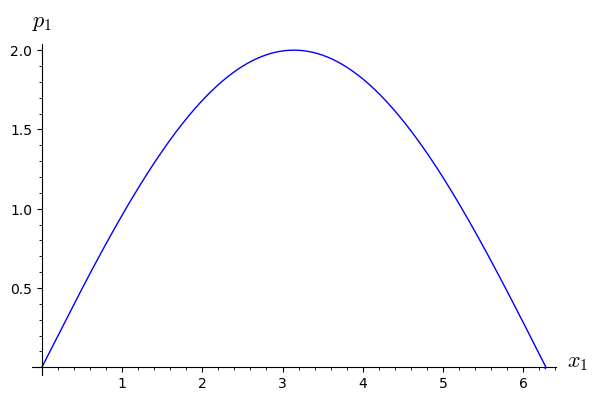

In [45]:
p = line(zip(sol[:,1],sol[:,0]), axes_labels=['$x_1$','$p_1$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

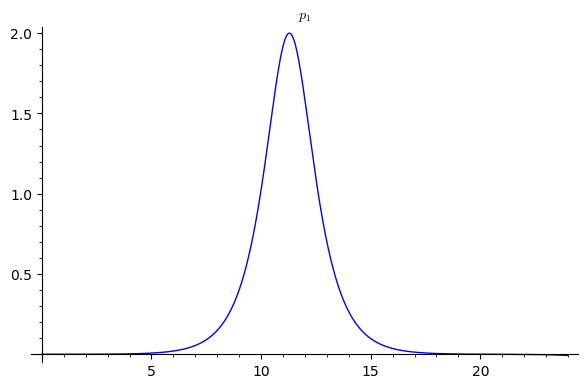

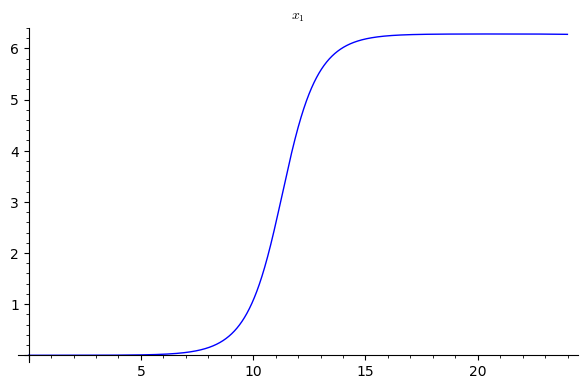

In [46]:
p = line(zip(times,sol[:,0]))
p.show(title="$p_1$")

p = line(zip(times,sol[:,1]))
p.show(title="$x_1$")

In [39]:
def make_energy_plot():
    previose_x_value = x0
    previose_phi_value = 0
    H_t = []
    phi_t = [] # фаза процесса - отношение текущего импульса к координате
    phi2_t = [] # фаза процесса - отношение текущего импульса к координате
    phi_cycles = 0
    
    omega_t = []
    
    integral = 0
    integrals_t = []
    
    for t_value, [p_value, x_value] in zip(times,sol):
        H_value = H_subs.subs(p_1 == p_value, Phi == x_value, t = t_value).n()
        phi_value = atan2(p_value, x_value)
        
        H_t += [[t_value, H_value]]
        phi_t += [[t_value, phi_value]]
        delta_phi = phi_value - previose_phi_value
        delta_x = x_value - previose_x_value

        integral += delta_x * p_value 

        if abs(delta_phi) >= pi:
            phi_cycles -= 2* pi

        phi2_t += [[t_value, phi_value+phi_cycles]]

        if abs(delta_phi) <= pi and phi_value * previose_phi_value < 0:
            integrals_t += [[t_value, integral]]
            integral = 0

            omega_value = (phi_value+phi_cycles) / t_value
            omega_t += [[t_value, omega_value]]

        previose_phi_value = phi_value
        previose_x_value = x_value

    p = line(H_t)
    p.show(title="$энергия\\,процесса$")

    #p = line(phi_t)
    #p.show(title="$фаза\\,процесса$")

    #p = line(phi2_t)
    #p.show(title="$фаза\\,процесса$")
    
    p = line(omega_t)
    p.show(title="$частота\\,процесса$")
    
    p = line(integrals_t)
    p.show(title="$адиабатический\\,инвариант\\,процесса$")
    
    return integrals_t

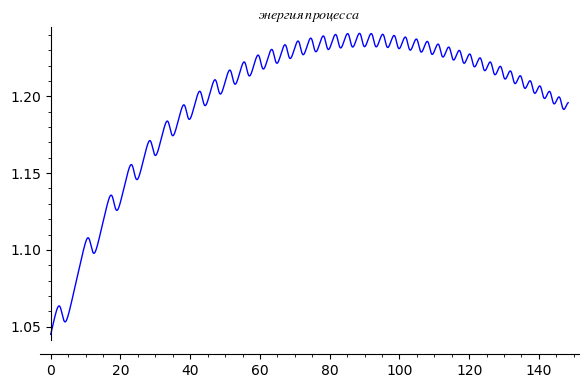

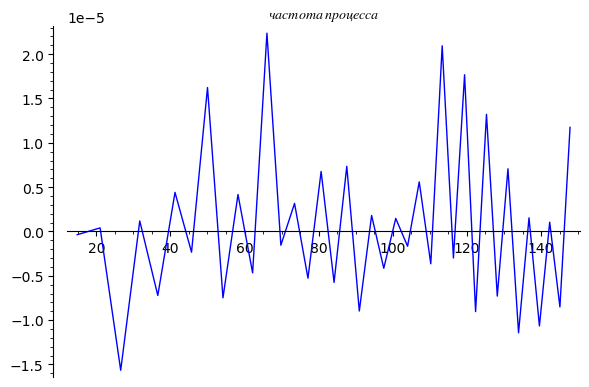

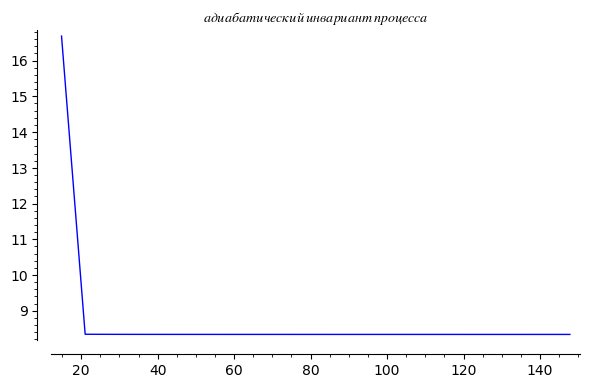

[[14.8599999999997, 16.686576088531453],
 [21.0400000000005, 8.342915706318776],
 [26.5900000000014, 8.340766755242194],
 [31.7300000000022, 8.33990578684762],
 [36.6000000000013, 8.339441231328674],
 [41.2400000000004, 8.339150310602864],
 [45.6999999999995, 8.33895104384026],
 [50.0099999999986, 8.338806677660076],
 [54.1799999999978, 8.338695910200574],
 [58.2299999999970, 8.338610161923347],
 [62.1799999999962, 8.33854165898065],
 [66.0399999999969, 8.338485551396225],
 [69.7999999999988, 8.338437371034475],
 [73.4900000000007, 8.338398009433805],
 [77.1100000000025, 8.338363336096734],
 [80.6600000000044, 8.338333356627105],
 [84.1500000000061, 8.33830765786021],
 [87.5800000000079, 8.338285381466642],
 [90.9600000000096, 8.338265501003015],
 [94.2800000000113, 8.338246085671024],
 [97.5600000000130, 8.338229669978618],
 [100.790000000015, 8.338214266980751],
 [103.980000000016, 8.338200406911294],
 [107.130000000018, 8.338187579541827],
 [110.240000000019, 8.338175577182101],
 [1

In [40]:
make_energy_plot()

In [41]:
times = srange(0, 48.01, 0.001)

sol = desolve_odeint(des=f, ics=[p0,x0], times=times, dvars=[p_1, Phi], ivar=t)

# Построение фазовых диаграмм ($p(x)$)

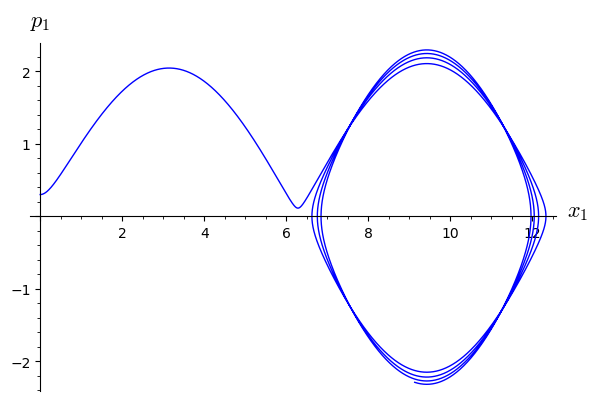

In [42]:
p = line(zip(sol[:,1],sol[:,0]), axes_labels=['$x_1$','$p_1$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

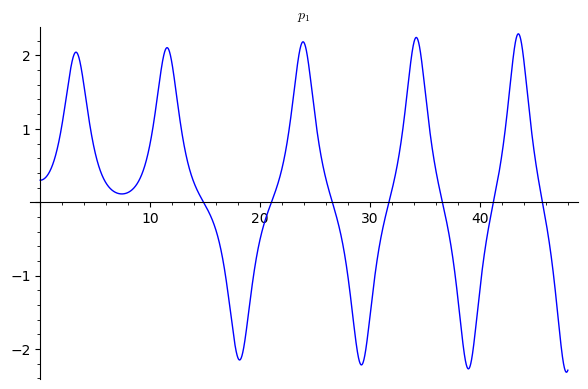

In [43]:
p = line(zip(times,sol[:,0]))
p.show(title="$p_1$")

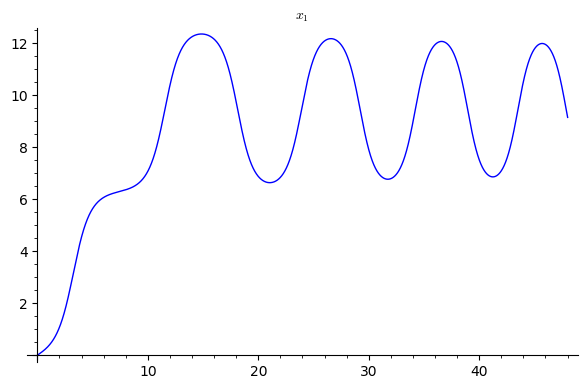

In [44]:
p = line(zip(times,sol[:,1]))
p.show(title="$x_1$")

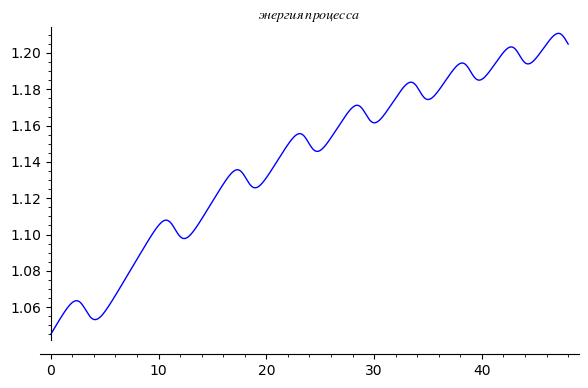

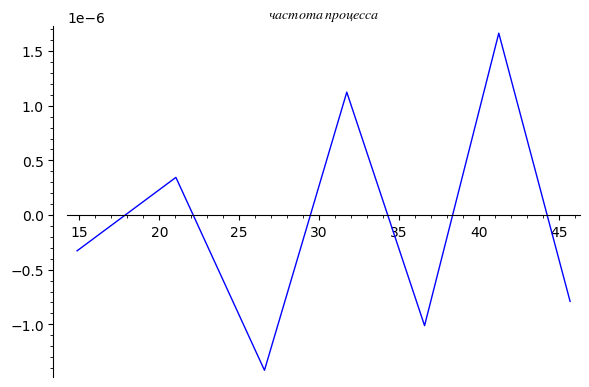

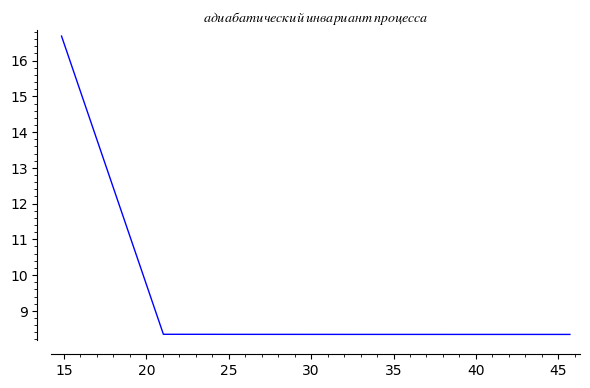

[[14.8599999999972, 16.686873894519042],
 [21.0400000000027, 8.34297437385255],
 [26.5810000000095, 8.34083335616187],
 [31.7300000000158, 8.33997939277299],
 [36.5960000000054, 8.339520709724907],
 [41.2389999999946, 8.339234606473102],
 [45.6989999999842, 8.339040223526213]]

In [45]:
make_energy_plot()